In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# reading the train dataset to a panda dataframe
# the train dataset contains the price column and would be used for training the model
train = pd.read_csv('Housing_dataset_train.csv') 

train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [3]:
# reading the test dataset to a panda dataframe
# the test dataset contains all the features, but no price column(target). The trained model would be used to predict the prices
test = pd.read_csv('Housing_dataset_test.csv')

test

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [4]:
train['ind'] = 1
test['ind'] = 0

# Concatenate train and test DataFrames
df = pd.concat([train, test])

# Output the combined DataFrame
df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


### Data Cleaning

In [5]:
# calculate the median for the bdroom, bathroom and parking_space columns
median_bedroom = round(df['bedroom'].median(),0)
median_bathroom = round(df['bathroom'].median(),0)
median_parking_space = round(df['parking_space'].median(),0)

# Fill the missing values with the median of each column
df['bedroom'].fillna(median_bedroom, inplace=True)
df['bathroom'].fillna(median_bathroom, inplace=True)
df['parking_space'].fillna(median_parking_space, inplace=True)

In [6]:
# rename the loc column as location
df.rename(columns={'loc':'location'}, inplace = True)

In [7]:
# calculate the mode for the location and title columns
mode_location = df['location'].mode()[0]
mode_title = df['title'].mode()[0]

# Fill the missing values with the mode of each column
df['location'].fillna(mode_location, inplace=True)
df['title'].fillna(mode_title, inplace=True)

In [8]:
# check for missing values
df.isnull().sum()

ID                  0
location            0
title               0
bedroom             0
bathroom            0
parking_space       0
price            6000
ind                 0
dtype: int64

> The only null values are from the price column in the test dataframe which is to predicted using the trained model.

### Feature Engineering

In [9]:
# find the ratio of the bedrooms to the bathrooms
df['ratio_bed_bath'] = df['bedroom']/df['bathroom']

# summation of the number of bedrooms, bathrooms, and parking space
df['sum_bed_bath_park'] = df['bedroom'] + df['bathroom'] + df['parking_space']

In [10]:
# getting the population density for each state
population_density = {
    'Abia': 840,
    'Adamawa': 122.7,
    'Akwa Ibom': 726.0,
    'Anambra': 1264,
    'Bauchi': 273.9,
    'Bayelsa': 270.2,
    'Benue': 145.1,
    'Borno': 84.70,
    'Cross River': 209.6,
    'Delta': 331.8,
    'Ebonyi': 499.8,
    'Edo': 244.2,
    'Ekiti': 621.3,
    'Enugu': 1300,
    'Gombe': 238.0,
    'Imo': 1063,
    'Jigawa': 319.9,
    'Kaduna': 200.4,
    'Kano': 764.3,
    'Katsina': 427.8,
    'Kebbi': 149.6,
    'Kogi': 154.1,
    'Kwara': 106.2,
    'Lagos': 3791,
    'Nasarawa': 109.9,
    'Niger': 95.60,
    'Ogun': 382.8,
    'Ondo': 353.3,
    'Osun': 520.6,
    'Oyo': 288.5,
    'Plateau': 181.3,
    'Rivers': 773.3,
    'Sokoto': 205.9,
    'Taraba': 61.40,
    'Yobe': 79.77,
    'Zamfara': 170.2
}

# convert the population densities to a list
population_densities = list(population_density.values())

# Calculate percentiles
percentiles = [0, 20, 40, 60, 100]
population_percentiles = [np.percentile(population_densities, p) for p in percentiles]

# Categorize states based on percentiles
class_1 = [state for state, density in population_density.items() if density > population_percentiles[4]]
class_2 = [state for state, density in population_density.items() if density > population_percentiles[3] and density <= population_percentiles[4]]
class_3 = [state for state, density in population_density.items() if density > population_percentiles[2] and density <= population_percentiles[3]]
class_4 = [state for state, density in population_density.items() if density > population_percentiles[1] and density <= population_percentiles[2]]
class_5 = [state for state, density in population_density.items() if density <= population_percentiles[1]]

# Print the states in each population density class
print('Class 1:', class_1)
print('Class 2:', class_2)
print('Class 3:', class_3)
print('Class 4:', class_4)
print('Class 5:', class_5)

Class 1: []
Class 2: ['Abia', 'Akwa Ibom', 'Anambra', 'Ebonyi', 'Ekiti', 'Enugu', 'Imo', 'Kano', 'Katsina', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Rivers']
Class 3: ['Bauchi', 'Bayelsa', 'Delta', 'Edo', 'Gombe', 'Jigawa', 'Oyo']
Class 4: ['Cross River', 'Kaduna', 'Kebbi', 'Kogi', 'Plateau', 'Sokoto', 'Zamfara']
Class 5: ['Adamawa', 'Benue', 'Borno', 'Kwara', 'Nasarawa', 'Niger', 'Taraba', 'Yobe']


In [11]:
df['population_density_level'] = df['location'].apply(lambda x: 5 if x in class_1
                                                     else 4 if x in class_2
                                                     else 3 if x in class_3
                                                     else 2 if x in class_4
                                                     else 1 if x in class_5
                                                     else 0)

In [12]:
# create a list of the states in each population density level
population_level_1 = ['Anambra', 'Enugu', 'Imo', 'Lagos']
population_level_2 = ['Abia', 'Kano', 'Rivers']
population_level_3 = ['Akwa Ibom', 'Ebonyi', 'Ekiti', 'Osun']
population_level_4 = ['Katsina', 'Ogun', 'Ondo']
population_level_5 = ['Bauchi', 'Delta', 'Jigawa', 'Oyo']
population_level_6 = ['Bayelsa', 'Edo', 'Gombe']
population_level_7 = ['Cross River', 'Kaduna', 'Plateau', 'Sokoto']
population_level_8 = ['Kebbi', 'Kogi', 'Zamfara']
population_level_9 = ['Adamawa', 'Benue', 'Kwara', 'Nasarawa']
population_level_10 = ['Borno', 'Niger', 'Taraba', 'Yobe']

df['population_density_level'] = df['location'].apply(lambda x: 10 if x in population_level_1
                                                                    else 9 if x in population_level_2
                                                                    else 8 if x in population_level_3
                                                                    else 7 if x in population_level_4
                                                                    else 6 if x in population_level_5
                                                                    else 5 if x in population_level_6
                                                                    else 4 if x in population_level_7
                                                                    else 3 if x in population_level_8
                                                                    else 2 if x in population_level_9
                                                                    else 1 if x in population_level_10
                                                                    else 0)


  
df

,ID,location,title,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,population_density_level
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,7
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,7
2,9261,Ekiti,Flat,7.0,5.0,3.0,3364799.814,1,1.400000,15.0,8
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,10
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,3
...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0,0.800000,11.0,8
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0,0.714286,13.0,2
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0,4.000000,9.0,6
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0,0.428571,15.0,6


In [13]:
import category_encoders as ce

# Create a new DataFrame to store the encoded values
encoded_df = df.copy()

# Define the encoder instance
encoder = ce.TargetEncoder(cols=['location'])

# Fit the encoder on the 'location' column and 'price' target variable
encoder.fit(encoded_df['location'], encoded_df['price'])

# Transform the 'location' column with the encoded values
encoded_df['location_encoded'] = encoder.transform(encoded_df['location'])

# Drop the original 'location' column
encoded_df.drop('location', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'location' column
encoded_df

,ID,title,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,population_density_level,location_encoded
0,3583,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,7,1.947589e+06
1,2748,Apartment,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,7,2.277494e+06
2,9261,Flat,7.0,5.0,3.0,3364799.814,1,1.400000,15.0,8,2.109220e+06
3,2224,Detached duplex,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,10,2.198073e+06
4,10300,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,3,1.763416e+06
...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Flat,4.0,5.0,2.0,NaN,0,0.800000,11.0,8,2.109220e+06
5996,2416,Terrace duplex,5.0,7.0,1.0,NaN,0,0.714286,13.0,2,1.905287e+06
5997,10195,Townhouse,4.0,1.0,4.0,NaN,0,4.000000,9.0,6,2.293159e+06
5998,9455,Flat,3.0,7.0,5.0,NaN,0,0.428571,15.0,6,1.772961e+06


In [14]:
# Define the encoder instance
encoder = ce.TargetEncoder(cols=['title'])

# Fit the encoder on the 'loc' column and 'price' target variable
encoder.fit(encoded_df['title'], encoded_df['price'])

# Transform the 'loc' column with the encoded values
encoded_df['title_encoded'] = encoder.transform(encoded_df['title'])

# Drop the original 'title' column 
encoded_df.drop('title', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'loc' column
encoded_df

,ID,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,population_density_level,location_encoded,title_encoded
0,3583,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,7,1.947589e+06,1.918468e+06
1,2748,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,7,2.277494e+06,1.567004e+06
2,9261,7.0,5.0,3.0,3364799.814,1,1.400000,15.0,8,2.109220e+06,1.972723e+06
3,2224,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,10,2.198073e+06,2.205883e+06
4,10300,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,3,1.763416e+06,1.927270e+06
...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,4.0,5.0,2.0,NaN,0,0.800000,11.0,8,2.109220e+06,1.972723e+06
5996,2416,5.0,7.0,1.0,NaN,0,0.714286,13.0,2,1.905287e+06,1.927270e+06
5997,10195,4.0,1.0,4.0,NaN,0,4.000000,9.0,6,2.293159e+06,2.056125e+06
5998,9455,3.0,7.0,5.0,NaN,0,0.428571,15.0,6,1.772961e+06,1.972723e+06


### Data Modelling

In [15]:
# splitting the encoded_df into the train and test dataframes. The train dataframe is to be used for training the model
train = encoded_df[encoded_df.ind == 1]
test = encoded_df[encoded_df.ind == 0]

In [16]:
# create the features 
features_df = train.drop(columns = ['ID','ind','price'])

# create the target
target_df = train['price']

In [17]:
# splitting the training dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 1)

In [18]:
# import the necessary machine learning models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [19]:
# putting the models in a dictionary
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(verbose=0),
          'XGBoost Regressor': XGBRegressor(verbosity=0),  
          'Ridge': Ridge(),
          'Cat Boost Regressor': CatBoostRegressor(verbose=0),
          'Support Vector Regressor': SVR(verbose=False)} 

# Setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(10)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        model_scores[name] = rmse
    return model_scores

In [20]:
%%time

scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
scores

CPU times: total: 28.5 s
Wall time: 20.7 s


{'Linear Regression': 613042.71449259,
 'Random Forest': 603685.9805392368,
 'XGBoost Regressor': 598444.8826579332,
 'Ridge': 613042.5114360001,
 'Cat Boost Regressor': 561080.4833438796,
 'Support Vector Regressor': 1138894.5669237454}

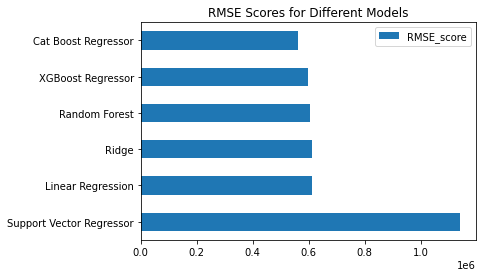

In [21]:
model_compare = pd.DataFrame(scores, index = ['RMSE_score'])

# Transpose the DataFrame and sort it in ascending order based on RMSE_score
model_compare_sorted = model_compare.T.sort_values(by='RMSE_score', ascending=False)

model_compare_sorted.plot.barh()
plt.title('RMSE Scores for Different Models');

> Since we are looking for the model with the least Rmse score, the Catboost regressor, XGBoost regressor and the Random Forest are the three best models with rmse of 561080.48, 598444.88 and 603685.98 respectively.

In [22]:
# performing a k-fold cross validation on the models to improve the mdoels' performance
from sklearn.model_selection import KFold

def kfold_cross_validation(model, features_df, target_df, num_folds=5):
    np.random.seed(20)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    kf.split(features_df)
    
    # Store the cross-validation scores
    cv_scores = []

    # Split the data into k folds and perform cross-validation
    for train_index, test_index in kf.split(features_df):
        X_train, X_test = features_df.iloc[train_index], features_df.iloc[test_index]
        y_train, y_test = target_df[train_index], target_df[test_index]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate the RMSE for the current fold and store it in cv_scores
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        cv_scores.append(rmse)

    return cv_scores

In [23]:
# Apply k-fold cross-validation and get mean RMSE scores for each model
cv_scores = {}

# Set all models to be non-verbose (suppress output)
for model in models.values():
    model.verbose = 0
    
for name, model in models.items():
    scores = kfold_cross_validation(model, features_df, target_df, num_folds=5)
    cv_scores[name] = np.mean(scores)

# Display the mean RMSE scores for each model
for name, score in cv_scores.items():
    print(f"{name}: Mean RMSE = {score}")

Linear Regression: Mean RMSE = 571195.3704449823
Random Forest: Mean RMSE = 594410.1992617316
XGBoost Regressor: Mean RMSE = 578968.3162633185
Ridge: Mean RMSE = 571195.3618265031
Cat Boost Regressor: Mean RMSE = 553812.6902043064
Support Vector Regressor: Mean RMSE = 1109379.1545531042


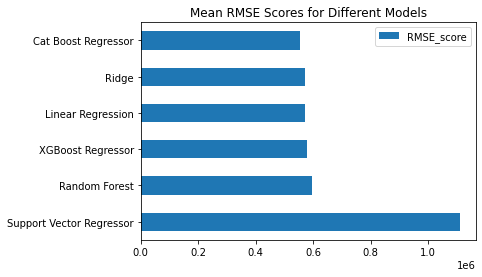

In [24]:
model_compare = pd.DataFrame(cv_scores, index = ['RMSE_score'])

# Transpose the DataFrame and sort it in ascending order based on RMSE_score
model_compare_sorted = model_compare.T.sort_values(by='RMSE_score', ascending=False)

model_compare_sorted.plot.barh()
plt.title('Mean RMSE Scores for Different Models');

> Catboost regressor model has the least rmse of 553812.69, followed by Ridge and Linear regression. The rmse score gotten after cross validation for the catboost model is lesser than the previous rmse score 0f 561,080.

In [25]:
# perform a hyperparameter tuning on some selected models
from sklearn.model_selection import GridSearchCV

# Selected models
catboost_model = CatBoostRegressor(verbose = 0)
xgboost_model = XGBRegressor(verbosity = 0)
random_forest_model = RandomForestRegressor(verbose = 0)

# Parameter grids for hyperparameter tuning
catboost_params = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the trees
    # Add more hyperparameters specific to CatBoostRegressor
}

xgboost_params = {
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [4, 6, 8],  # Maximum depth of the trees
    # Add more hyperparameters specific to XGBRegressor
}

random_forest_params = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    # Add more hyperparameters specific to RandomForestRegressor
}

# Perform GridSearchCV for hyperparameter tuning
def perform_gridsearch(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model, best_params

# calling the perform_gridsearch function on the selected models
best_catboost_model, best_catboost_params = perform_gridsearch(catboost_model, catboost_params, X_train, y_train)
best_xgboost_model, best_xgboost_params = perform_gridsearch(xgboost_model, xgboost_params, X_train, y_train)
best_random_forest_model, best_random_forest_params = perform_gridsearch(random_forest_model, random_forest_params, X_train, y_train)

In [26]:
from math import sqrt

# Best CatBoost model with the best hyperparameters
best_catboost_model = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6, verbose = 0)

# Best XGBoost model with the best hyperparameters
best_xgboost_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, verbosity = 0)

# Best Decision Tree model with the best hyperparameters
best_random_forest_model = RandomForestRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=2, verbose = 0)

# Train the models on the entire training data
best_catboost_model.fit(X_train, y_train)
best_xgboost_model.fit(X_train, y_train)
best_random_forest_model.fit(X_train, y_train)

# Make predictions on the test data using the trained models
catboost_predictions = best_catboost_model.predict(X_test)
xgboost_predictions = best_xgboost_model.predict(X_test)
random_forest_predictions = best_random_forest_model.predict(X_test)

# Calculate the RMSE scores on the test predictions
catboost_rmse = sqrt(mean_squared_error(y_test, catboost_predictions))
xgboost_rmse = sqrt(mean_squared_error(y_test, xgboost_predictions))
random_forest_rmse = sqrt(mean_squared_error(y_test, random_forest_predictions))

print(f"CatBoost RMSE: {catboost_rmse}")
print(f"XGBoost RMSE: {xgboost_rmse}")
print(f"Random Forest RMSE: {random_forest_rmse}")

CatBoost RMSE: 557634.5763945092
XGBoost RMSE: 567397.8834312579
Random Forest RMSE: 575997.3977022095


> Of the three selected models, Catboost regressor had the least rmse score of 557,634.58 followed by the XGBoost and then the random forest model. However, the Cross-validated catboost model has the least rmse score when comapred to the hyperparameter tuned catboost and plain catboost model. After careful considerations, the cross-validated catboost would be the chosen model for the prediction. 

In [27]:
# Create the CatBoostRegressor model with desired hyperparameters
catboost_model = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6, verbose = 0)

# Set the number of folds for k-fold cross-validation
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the RMSE scores for each fold
rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features_df):
    X_train, X_test = features_df.iloc[train_index], features_df.iloc[test_index]
    y_train, y_test = target_df.iloc[train_index], target_df.iloc[test_index]

    # Fit the model on the training data
    catboost_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = catboost_model.predict(X_test)

    # Calculate RMSE for this fold
    fold_rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    rmse_scores.append(fold_rmse)

# Calculate the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Cross-Validation RMSE: (mean_rmse: {mean_rmse:.2f}, standard_deviation_rmse: {std_rmse:.2f})")

Cross-Validation RMSE: (mean_rmse: 543725.35, standard_deviation_rmse: 32235.84)


In [28]:
# write a function to get the feature importance
def get_feature_importance (model, X_train, y_train):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = pd.Series(model.feature_importances_, index = X_train.columns)

    return feature_importances

In [29]:
# Check feature importance using the Validated Catboost model
feature_importances = get_feature_importance (catboost_model, X_train, y_train)

print("Feature Importance during Model Evaluation:")
print(feature_importances)

Feature Importance during Model Evaluation:
bedroom                     20.540457
bathroom                     2.002140
parking_space                1.762117
ratio_bed_bath               2.264620
sum_bed_bath_park            7.958788
population_density_level     5.879206
location_encoded            26.923213
title_encoded               32.669458
dtype: float64


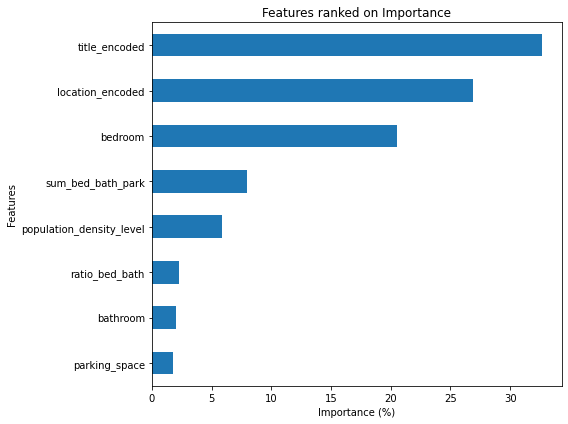

In [30]:
# convert the feature_importances to a pandas series
importances = pd.Series(feature_importances)
# Plot the feature importances as a bar chart
plt.figure(figsize=(8, 6))
importances.sort_values(ascending= True).plot(kind='barh')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Features ranked on Importance')
plt.tight_layout()
plt.show()

### Make predictions on the test dataset using the validated catboost model

In [31]:
# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

X_test = test.drop(['ID'], axis=1)

# Use the trained model to predict prices for the test dataset
y_pred = catboost_model.predict(X_test)

y_pred_series = pd.Series(y_pred, name='price', dtype=float)

# Create the predictions DataFrame
predictions_df = pd.DataFrame({'ID': test['ID'], 'price': y_pred_series})

# Display the predictions DataFrame
print(predictions_df)

         ID      price
0       845 2367847.10
1      1924 1069545.22
2     10718 1252199.71
3     12076 8927024.10
4     12254 1936921.24
...     ...        ...
5995   1594 2089922.70
5996   2416 2008829.80
5997  10195 1970224.42
5998   9455 1657186.02
5999  11736 3390317.25

[6000 rows x 2 columns]


In [32]:
# save the predictions to a csv
predictions_df.to_csv('Wazobia_Predictions.csv', index=False)